
# Titanic Data Analysis with Probability


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part A – Data Exploration (Pandas And Numpy)

##### Load the dataset

In [315]:
df = pd.read_csv("Titanic-Dataset.csv")


##### Display the first 10 rows

In [316]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Print the column names and their data types

In [49]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### view basic statistics (mean, min, max, etc.).

In [14]:

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##### Check for missing values

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Replace missing Age values with the mean age

In [56]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


##### Fill missing Embarked values with the most common port

In [59]:

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

##### How many passengers were onboard?

In [87]:
total_passengers = df['PassengerId'].count()

total_passengers

np.int64(891)

##### What is the average Age?

In [65]:
avg_age = df['Age'].mean()

avg_age

np.float64(29.69911764705882)

##### What is the average Fare?

In [66]:
avg_fare = df['Fare'].mean()

avg_fare

np.float64(32.204207968574636)

##### How many males and females were there?

In [84]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Part B – Data Analysis (Pandas)

##### How many survived vs. did not survive?

In [207]:
survival_counts = df['Survived'].value_counts().rename(index={0:'Did not survive',1:'Survived'})

survival_counts



Survived
Did not survive    549
Survived           342
Name: count, dtype: int64

##### What percentage of passengers survived?

In [317]:
survived_percent = ((survival_counts['Survived'] / df['Survived'].count()) * 100).round(2)

survived_percent

np.float64(38.38)

##### Find survival rates for 1st, 2nd, and 3rd class.

In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].agg(['mean','count','sum']).rename(columns={'mean':'survival_rate', 'count': 'Total Passengers', 'sum': 'Survived'})

survival_by_class['Did not Survived'] = survival_by_class['Total Passengers'] - survival_by_class['Survived']

survival_by_class['survival_rate'] = (survival_by_class['survival_rate'] * 100).round(2)

survival_by_class



,survival_rate,Total Passengers,Survived,Did not Survived
Pclass,,,,
1,62.96,216,136,80
2,47.28,184,87,97
3,24.24,491,119,372


##### Which class had the highest chance of survival?

In [254]:
highest_survival_chances_by_class = survival_by_class['survival_rate'].idxmax()

highest_survival_chances_by_class

np.int64(1)

##### Divide passengers into age groups and Calculate survival rate for each group.

In [319]:

bins = [0, 12, 19, 40, np.inf]
labels = ['Child (0-12)', 'Teen (13-19)', 'Adult (20-40)', 'Senior (41+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)


survival_rate_by_age = (df.groupby('AgeGroup')['Survived'].agg(['mean']).rename(columns={'mean':'Survival rate'}) * 100).round(2)

survival_rate_by_age

C:\Users\faraz\AppData\Local\Temp\ipykernel_11020\990902698.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = (df.groupby('AgeGroup')['Survived'].agg(['mean']).rename(columns={'mean':'Survival rate'}) * 100).round(2)


,Survival rate
AgeGroup,
Child (0-12),57.97
Teen (13-19),41.05
Adult (20-40),39.00
Senior (41+),36.67


## Part C – Visualization (Matplotlib And Seaborn)

##### Bar chart: Number of survivors (0 vs 1).

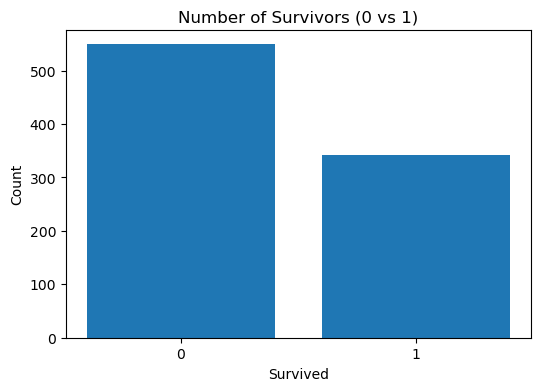

In [205]:

counts = df['Survived'].value_counts().sort_index()  
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Number of Survivors (0 vs 1)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


##### Histogram: Distribution of passenger ages (bins = 20).

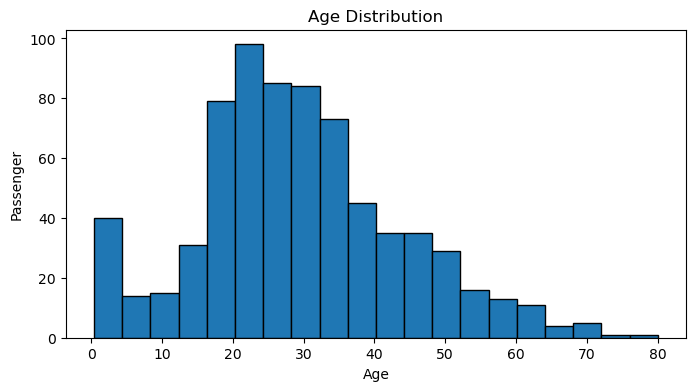

In [321]:

plt.figure(figsize=(8,4))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Passenger')
plt.show()


##### Pie chart: Gender distribution.

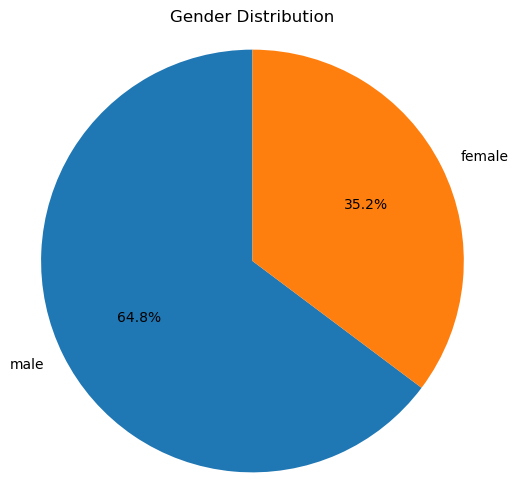

In [322]:

gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


##### Countplot: Survived by Sex (Who survived more?).

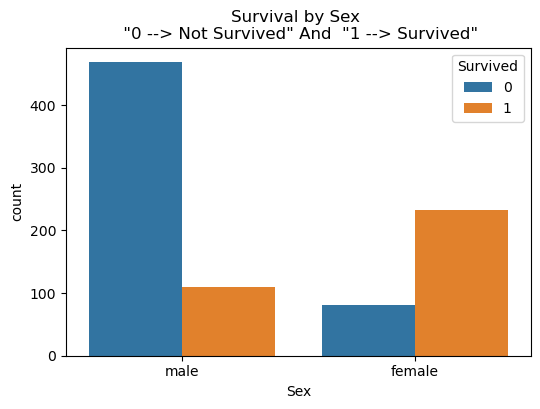

In [326]:

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex \n "0 --> Not Survived" And  "1 --> Survived"')
plt.show()

##### Boxplot: Fare by Pclass (Which class paid more?).

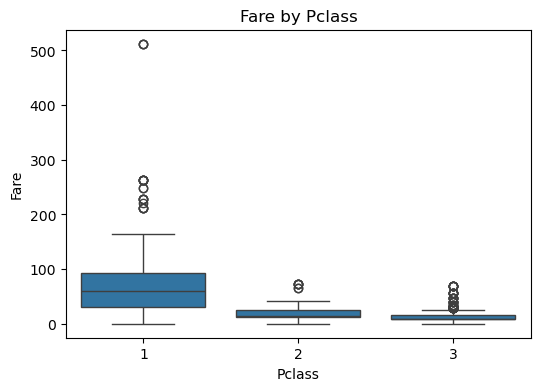

In [209]:

plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.show()


##### Violinplot: Age by Survived (Age distribution among survivors).

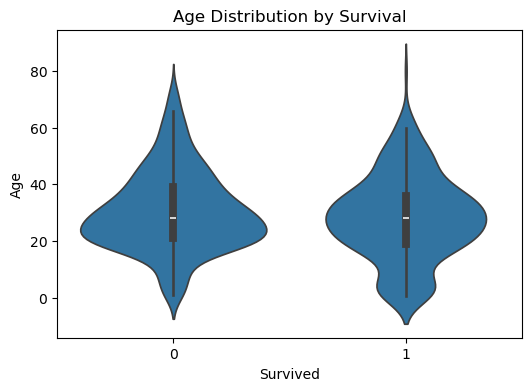

In [329]:

plt.figure(figsize=(6,4))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()


##### Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).

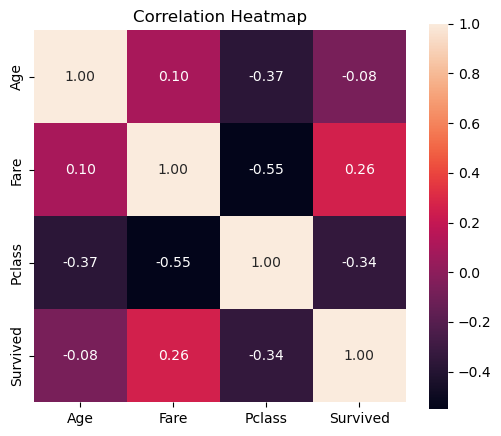

In [330]:

num_cols = ['Age','Fare','Pclass','Survived']
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


## Part D – Probability Concepts

##### Probability a passenger survived:

In [224]:
total = df['PassengerId'].count()
survivors = df['Survived'].sum()
passenger_survived = ((survivors / total)*100).round(2)

passenger_survived

np.float64(38.38)

##### Probability a female survived:

In [227]:
females = df[df['Sex']=='female']

females_survived = ((females['Survived'].sum() / females['Survived'].count())*100).round(2)

females_survived

np.float64(74.2)

##### Probability a male survived:

In [ ]:
males = df[df['Sex']=='male']

males_survived = ((males['Survived'].sum() / males['Survived'].count())*100).round(2)

males_survived

np.float64(18.89)

##### Compare probabilities across Pclass.

In [239]:

pclasses_probabilities = ((df.groupby('Pclass')['Survived'].agg(['mean']).rename(columns={'mean':'Survival rate'}))*100).round(2)


pclasses_probabilities

,Survival rate
Pclass,
1,62.96
2,47.28
3,24.24


##### Theoretical Probability (Assumptions)

In [313]:
theoretical_probabilities = {
    'P(Survived)': 0.5,
    'P(Female Survived)': 0.5,
    'P(Male Survived)': 0.5,
    'P(Survived Pclass=1)': 1/3,
    'P(Survived Pclass=2)': 1/3,
    'P(Survived Pclass=3)': 1/3
}


theoretical_probabilities_df = pd.DataFrame(list(theoretical_probabilities.items()), columns=['Categories','Theoretical Probability'])

theoretical_probabilities_df['Theoretical Probability'] = (theoretical_probabilities_df['Theoretical Probability'] * 100).round(2)

theoretical_probabilities_df


,Categories,Theoretical Probability
0,P(Survived),50.00
1,P(Female Survived),50.00
2,P(Male Survived),50.00
3,P(Survived Pclass=1),33.33
4,P(Survived Pclass=2),33.33
5,P(Survived Pclass=3),33.33


## Part E – Insights And Reporting

##### Did women survive at a higher rate than men?

In [248]:
print('Yes') if females_survived > males_survived else print('No')

Yes


##### Which class had the best survival chance?

In [256]:
print(f'Class: {highest_survival_chances_by_class}')

Class: 1


##### Did age play a role in survival?

In [263]:
print(f'Yes! because "{survival_rate_by_age.index[0]}" Survived more than "{survival_rate_by_age.index[1]}", "{survival_rate_by_age.index[2]}" and "{survival_rate_by_age.index[3]}"')

Yes! because "Child (0-12)" Survived more than "Teen (13-19)", "Adult (20-40)" and "Senior (41+)"


##### Was Fare (ticket price) related to survival?

In [268]:
fare_survival_corr = df['Fare'].corr(df['Survived'])

if fare_survival_corr > 0:
    print("Yes")
else:
    print("No")


Yes


##### How do empirical probabilities differ from theoretical probabilities?

##### Empirical probabilities:

In [311]:
empirical_probabilities = {
    "P(Survived)": passenger_survived,
    "P(Female Survived)": females_survived,
    "P(Male Survived)": males_survived,
    "P(Survived Pclass=1)": survival_by_class.loc[1, 'survival_rate'],
    "P(Survived Pclass=2)": survival_by_class.loc[2, 'survival_rate'],
    "P(Survived Pclass=3)": survival_by_class.loc[3, 'survival_rate'],
}


empirical_probabilities_df = pd.DataFrame(list(empirical_probabilities.items()), columns=['Categories', 'Empirical Probability'])

empirical_probabilities_df

,Categories,Empirical Probability
0,P(Survived),38.38
1,P(Female Survived),74.20
2,P(Male Survived),18.89
3,P(Survived Pclass=1),62.96
4,P(Survived Pclass=2),47.28
5,P(Survived Pclass=3),24.24


##### Empirical probabilities and theoretical probabilities comparison.

In [314]:
comparison_df = pd.merge(empirical_probabilities_df, theoretical_probabilities_df, on="Categories")

comparison_df["Emp - Theor"] = (comparison_df["Empirical Probability"] - comparison_df["Theoretical Probability"]).round(2)

comparison_df


,Categories,Empirical Probability,Theoretical Probability,Emp - Theor
0,P(Survived),38.38,50.00,-11.62
1,P(Female Survived),74.20,50.00,24.20
2,P(Male Survived),18.89,50.00,-31.11
3,P(Survived Pclass=1),62.96,33.33,29.63
4,P(Survived Pclass=2),47.28,33.33,13.95
5,P(Survived Pclass=3),24.24,33.33,-9.09


### Summary of Analysis  

-  Overall survival rate was about **38%**, which is lower than the theoretical assumption of 50%.  

-  Females had a much higher survival rate (**~74%**) compared to males (**~19%**), showing a strong gender difference.  

-  First-class passengers survived the most (**~63%**), followed by second-class (**~47%**), while third-class survival was the lowest (**~24%**).  

-  Fare (ticket price) was positively related to survival — passengers who paid higher fares had better survival chances.  

-  Empirical probabilities deviate significantly from theoretical ones (e.g., 74% vs. 50% for females, 63% vs. 33% for 1st class), showing survival was not random.  

-  The results reflect the historical “**women and children first**” and **social-class advantage** during evacuation.  

-  In conclusion, **gender, class, and fare** were the strongest factors influencing survival, not chance alone.  
